In [1]:
import os
from pathlib import Path
import sys
import os
import _pickle as pickle
import json
import copy 
import pandas
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages
import csv
import json
from collections import Counter
import statistics 

# Response Length

In [5]:
responseLen = []
for root, dirs, files in os.walk("../clean"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    for i in range(1, len(dialogs)):
                        responseLen.append(len(dialogs[i]['context']['userResponse']))
                    
                    
                except Exception as e: print(e)
                

In [7]:
print("Overall conversation response length: " + str(statistics.mean(responseLen)))

Overall conversation response length: 104.00680402491615


In [8]:
Set1 = []
Set2 = []
Set3 = []
Set4 = []
Set5 = []

for root, dirs, files in os.walk("../clean"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    if(data['settingNumber'] == 1):
                        for i in range(1, len(dialogs)):
                            Set1.append(len(dialogs[i]['context']['userResponse']))
                    
                    elif(data['settingNumber'] == 2):
                        for i in range(1, len(dialogs)):
                            Set2.append(len(dialogs[i]['context']['userResponse']))
                    
                    elif(data['settingNumber'] == 3):
                        for i in range(1, len(dialogs)):
                            Set3.append(len(dialogs[i]['context']['userResponse']))
                        
                    elif(data['settingNumber'] == 4):
                        for i in range(1, len(dialogs)):
                            Set4.append(len(dialogs[i]['context']['userResponse']))
                    
                    else:
                        for i in range(1, len(dialogs)):
                            Set5.append(len(dialogs[i]['context']['userResponse']))
 
                    
                    
                except Exception as e: print(e)

In [9]:
print("Setting 1 time taken: " + str(statistics.mean(Set1)))
print("Setting 2 time taken: " + str(statistics.mean(Set2)))
print("Setting 3 time taken: " + str(statistics.mean(Set3)))
print("Setting 4 time taken: " + str(statistics.mean(Set4)))
print("Setting 5 time taken: " + str(statistics.mean(Set5)))

Setting 1 time taken: 60.9
Setting 2 time taken: 145.23936529372045
Setting 3 time taken: 102.88122721749696
Setting 4 time taken: 77.99622641509434
Setting 5 time taken: 75.48806366047745


## Setting 2

In [10]:
sugg1 = []
sugg3 = []
sugg5 = []

autoSugg1 = []
autoSugg3 = []
autoSugg5 = []


for root, dirs, files in os.walk("../clean/Setting 2"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    if(data['autoFilledSuggestion'] == 0):
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                sugg1.append(len(dialogs[i]['context']['userResponse']))
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                sugg3.append(len(dialogs[i]['context']['userResponse']))
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                sugg5.append(len(dialogs[i]['context']['userResponse']))
                    
                    else:
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                autoSugg1.append(len(dialogs[i]['context']['userResponse']))
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                autoSugg3.append(len(dialogs[i]['context']['userResponse']))
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                autoSugg5.append(len(dialogs[i]['context']['userResponse']))
                    
                    
                except Exception as e: print(e)

### Suggestions Only

In [11]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(sugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(sugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(sugg5)))

Finished conversations with 1 suggestion(s): 101.72103004291846
Finished conversations with 3 suggestion(s): 124.61344537815125
Finished conversations with 5 suggestion(s): 147.32920792079207


### Autofilled Suggestion

In [12]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(autoSugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(autoSugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(autoSugg5)))

Finished conversations with 1 suggestion(s): 138.6844827586207
Finished conversations with 3 suggestion(s): 164.58267716535434
Finished conversations with 5 suggestion(s): 189.23295454545453


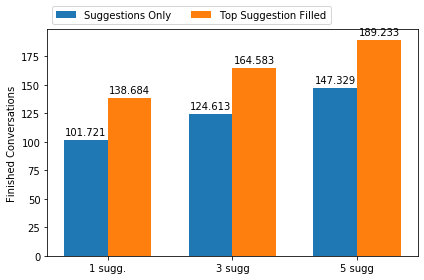

In [13]:
labels = ['1 sugg.', '3 sugg', '5 sugg']
suggMeans = [round(statistics.mean(sugg1), 3), round(statistics.mean(sugg3), 3), round(statistics.mean(sugg5), 3)]
sugFilledMeans = [round(statistics.mean(autoSugg1), 3), round(statistics.mean(autoSugg3), 3), round(statistics.mean(autoSugg5), 3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, suggMeans, width, label='Suggestions Only')
rects2 = ax.bar(x + width/2, sugFilledMeans, width, label='Top Suggestion Filled')


ax.set_ylabel('Finished Conversations')
#ax.set_title('Finished Conversations in Setting 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Setting 3

In [14]:
sugg1 = []
sugg3 = []
sugg5 = []

autoSugg1 = []
autoSugg3 = []
autoSugg5 = []


for root, dirs, files in os.walk("../clean/Setting 3"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    if(data['autoFilledSuggestion'] == 0):
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                sugg1.append(len(dialogs[i]['context']['userResponse']))
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                sugg3.append(len(dialogs[i]['context']['userResponse']))
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                sugg5.append(len(dialogs[i]['context']['userResponse']))
                    
                    else:
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                autoSugg1.append(len(dialogs[i]['context']['userResponse']))
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                autoSugg3.append(len(dialogs[i]['context']['userResponse']))
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                autoSugg5.append(len(dialogs[i]['context']['userResponse']))
                    
                    
                except Exception as e: print(e)

### Suggestions Only

In [15]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(sugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(sugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(sugg5)))

Finished conversations with 1 suggestion(s): 86.71713147410358
Finished conversations with 3 suggestion(s): 100.80378657487091
Finished conversations with 5 suggestion(s): 100.1697247706422


### Autofilled Suggestion


In [16]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(autoSugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(autoSugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(autoSugg5)))

Finished conversations with 1 suggestion(s): 94.5054432348367
Finished conversations with 3 suggestion(s): 113.07370517928287
Finished conversations with 5 suggestion(s): 120.03503184713375


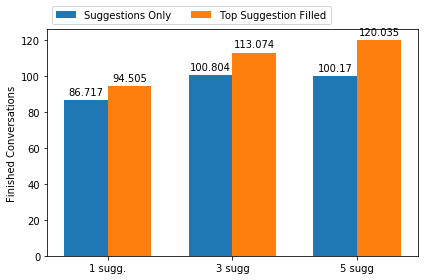

In [17]:
labels = ['1 sugg.', '3 sugg', '5 sugg']
suggMeans = [round(statistics.mean(sugg1), 3), round(statistics.mean(sugg3), 3), round(statistics.mean(sugg5), 3)]
sugFilledMeans = [round(statistics.mean(autoSugg1), 3), round(statistics.mean(autoSugg3), 3), round(statistics.mean(autoSugg5), 3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, suggMeans, width, label='Suggestions Only')
rects2 = ax.bar(x + width/2, sugFilledMeans, width, label='Top Suggestion Filled')


ax.set_ylabel('Finished Conversations')
#ax.set_title('Finished Conversations in Setting 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Setting 4

In [18]:
sugg1 = []
sugg3 = []
sugg5 = []

autoSugg1 = []
autoSugg3 = []
autoSugg5 = []


for root, dirs, files in os.walk("../clean/Setting 4"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    if(data['autoFilledSuggestion'] == 0):
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                sugg1.append(len(dialogs[i]['context']['userResponse']))
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                sugg3.append(len(dialogs[i]['context']['userResponse']))
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                sugg5.append(len(dialogs[i]['context']['userResponse']))
                    
                    else:
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                autoSugg1.append(len(dialogs[i]['context']['userResponse']))
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                autoSugg3.append(len(dialogs[i]['context']['userResponse']))
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                autoSugg5.append(len(dialogs[i]['context']['userResponse']))
                    
                    
                except Exception as e: print(e)

### Suggestions Only

In [19]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(sugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(sugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(sugg5)))

Finished conversations with 1 suggestion(s): 66.98398169336384
Finished conversations with 3 suggestion(s): 73.44702842377261
Finished conversations with 5 suggestion(s): 72.45224719101124


### Autofilled Suggestion

In [20]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(autoSugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(autoSugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(autoSugg5)))

Finished conversations with 1 suggestion(s): 75.8013698630137
Finished conversations with 3 suggestion(s): 92.89501312335958
Finished conversations with 5 suggestion(s): 86.21782178217822


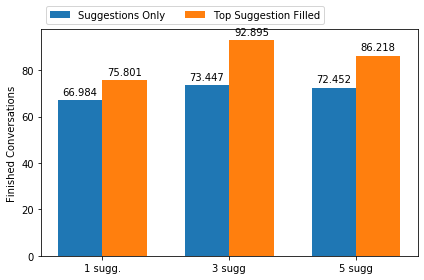

In [21]:
labels = ['1 sugg.', '3 sugg', '5 sugg']
suggMeans = [round(statistics.mean(sugg1), 3), round(statistics.mean(sugg3), 3), round(statistics.mean(sugg5), 3)]
sugFilledMeans = [round(statistics.mean(autoSugg1), 3), round(statistics.mean(autoSugg3), 3), round(statistics.mean(autoSugg5), 3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, suggMeans, width, label='Suggestions Only')
rects2 = ax.bar(x + width/2, sugFilledMeans, width, label='Top Suggestion Filled')


ax.set_ylabel('Finished Conversations')
#ax.set_title('Finished Conversations in Setting 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Setting 5

In [22]:

sugg1 = []

autoSugg1 = []


for root, dirs, files in os.walk("../clean/Setting 5"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    
                    if(data['autoFilledSuggestion'] == 0):
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                sugg1.append(len(dialogs[i]['context']['userResponse']))
                        
                       
                    else:
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                autoSugg1.append(len(dialogs[i]['context']['userResponse']))
                    
                    
                except Exception as e: print(e)



### Suggestions Only

In [23]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(sugg1)))


Finished conversations with 1 suggestion(s): 73.3385214007782


### Autofilled Suggestion

In [24]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(autoSugg1)))


Finished conversations with 1 suggestion(s): 77.27876823338735


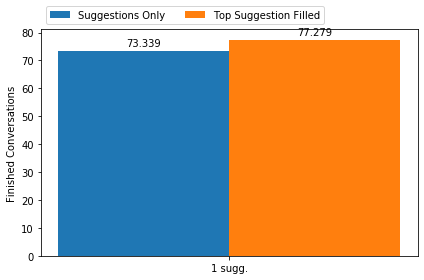

In [25]:
labels = ['1 sugg.']
suggMeans = [round(statistics.mean(sugg1), 3)]
sugFilledMeans = [round(statistics.mean(autoSugg1), 3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, suggMeans, width, label='Suggestions Only')
rects2 = ax.bar(x + width/2, sugFilledMeans, width, label='Top Suggestion Filled')


ax.set_ylabel('Finished Conversations')
#ax.set_title('Finished Conversations in Setting 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()